<center> <img src="http://oci02.img.iteso.mx/identidad_de_instancia_2018/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg"> </center>

<center><font color=#42c29b><font size=6> Genetic Net </font> <br>
<center><font color=#42c29b><font size=5> Diseño y Análisis de un Proceso de Modelación con Inteligencia Artificial para Sistemas de Trading </font> <br> <br>
<center> <font color= #004A94> <font size = 5> Msc en Ciencia de Datos </font>
<center><font color=#004A94><font size=4> Análisis y Diseño de Algorítmos. </font> <br>
<br> <font color= #047CFB> <font size = 4> Juan Francisco Muñoz Elguezabal - franciscome@iteso.mx </font> <br>
<center> <font color= #047CFB> <font size = 3> Repositorio de Github: <a href='https://github.com'>Link</a></font>
<center> <font color= #047CFB> <font size = 3> Video Explicativo: <a href='https://github.com'>Link</a></font>

# <font color= #555555> <font size = 5> Abstract </font>

<font color= #6B6B6B> <font size = 2> Este documento fue elaborado por tu **nombre completo**, como un trabajo parcial para la materia de **Microestructura y Sistemas de Trading - ITE1731**, la cual es parte del curriculum de la licenciatura en Ingeniería Financiera, ofertada por la universidad **ITESO**. En el presente trabajo se plantea la respuesta a la siguiente pregutna: *¿Qué estrategia de inversión propondrías si tu trabajo fuera administrar 1 Millón de pesos?*</font> 

<br>

# 1. Descripción del problema


<hr style="border:0.02in solid black"> </hr>

## 1.1 Introducción

Existen dos grandes formas de entender el proceso de inversión de un capital, una inversión pasiva, como los portafolios de inversión, y una inversión activa, como estrategias de trading.  Al acto de comprar y/o vender un activo financiero se le conoce como “Comerciar” o hacer “trading” y en la actualidad, la gran mayoría de esta actividad se lleva a cabo electrónicamente. Cuando se lleva a cabo un proceso de inversión activa con el objetivo de incrementar el capital, generalmente se recurre a llevar a cabo la actividad de trading con fines especulativos y en una frecuencia diaria, o incluso, cuando es realizada mediante sistemas informáticos, a una frecuencia de milisegundos. Independientemente de la frecuencia, se puede optar por 2 naturaleza de estrategias de trading, una discrecional (generalmente efectuada por profesionales) y una sistemática (generalmente efectuada por sistemas informáticos).

Cuando se plantea el uso de Machine Learning para formular una estrategia de trading de naturaleza sistemática, o también conocida como un sistema de trading algorítmico, en la generalidad de los casos se piensa en modelado predictivo del precio de un activo financiero y se plantea la predicción, bajo la perspectiva de pronósticos de precios futuros, como un problema de regresión (pronóstico del siguiente precio) o de clasificación (pronóstico de un estado alcista o bajista del precio). 

Para construir modelos predictivos se pueden utilizar variables de entrada exógenas (fenómenos/procesos externos al activo financiero) y variables de entrada endógenas (transformaciones matemáticas a la misma serie de tiempo del precio). Una vez diseñadas estas variables de entrada a través de un proceso conocido como Ingeniería de Variables, se conducen actividades como Importancia y Selección de variables, al final de los cuales se logra tener variables explicativas candidatas a ser utilizadas como entrada en los modelos propuestos. Es sabido que para modelar procesos financieros como el precio de activos bursátiles se necesita contar tanto con variables lineales como no lineales, así como con modelos de naturaleza lineal y no lineal. En el proceso de uso de variables, ajuste de modelos, optimización y backtest de los hiperparámetros es 

Finalmente, las técnicas de validación cruzada son frecuentemente utilizadas en problemas de optimización de modelos, Sin embargo se debe de tener una consideración especial cuando se trata de datos del tipo series de tiempo, esto es debido a que el orden de los datos debe de ser preservado durante el proceso de generación de subconjuntos de entrenamiento y prueba. Para abordar esta situación, se propone utilizar un método conocido como “Blocking Time Series Split” o División por Bloques de Series de Tiempo.

## 1.2 Problemática

* Variables explicativas
* División de conjuntos
* Optimización de hiperparámetros
* Visualización de resultados
* Error de Generalización en Modelos Predictivos

## 1.3 Hipótesis

1. Variables endógenas son suficientes para pronosticar bien
2. Optimización en T-Folds
2. Estabilidad paramétrica
3. Resultados +70%

## 1.4 Experimento

Precios de futuros continuos, variables endógenas de 3 tipos, divisiónm de t-folds, optimización con algoritmos genéticos, estabilidad paramétrica, desempeño final. 

# 2. Solución propuesta


<hr style="border:0.02in solid black"> </hr>

## 2.1 Librerías

Para la elaboración de este proyecto se utilizaron las siguientes liberías, las cuales, es necesario tenerlas instaladas y/o en el archivo *requirements.txt* con el siguiente contenido :

- pandas>=1.1.0
- numpy>=1.19.1
- jupyter>=1.0.0
- deap>=1.3.1
- gplearn>=0.4.1
- requests>=2.24.0
- plotly>=4.12.0
- scikit-learn>=0.23.2
- chart_studio>=1.1.0

## 2.2 Dependencias

La distribución de la funcionalidad de todo el proyecto fue un aspecto importante a considerar para mantener modularidad, eficiencia e interpretabilidad en este notebook. La organización del proyecto y las dependencias es la siguiente: 

In [8]:
%%capture
"""
- files
- - daily_prices : Precios historicos por día
- - minute_prices : Precios historicos por minuto
- - images : Imagenes Utilizadas en notebook
- - pickle_rick : Resultados para analisis de complejidad

- main.py : Secuencia principal del proyecto
- data.py : Entrada y salida de datos
- functions.py : operaciones, modelos, preprocesamiento de datos
- visualizations.py : graficas

- Genetic_Net_Report.ipynb : Este notebook
- Genetic_Net_Report.html : Version "Stand Alone" del notebook

- venv : Ambiente Virtual del Proyecto
- requirements.txt : Requerimientos de librerias
- README.md : Para repositorio
- .gitignore : Para repositorio
"""

In [1]:
%%capture
pip install -r requirements.txt

Cargar librerias y dependencias a utilizar en este notebook

In [2]:
# -- Librerias necesarias para este notebook
import warnings
from datetime import datetime
import pandas as pd
warnings.filterwarnings("ignore")

# -- Dependencias (scripts) necesarias para este notebook
import visualizations as vs
import data as dt
import functions as fn

import plotly.offline as py
py.init_notebook_mode(connected=True)

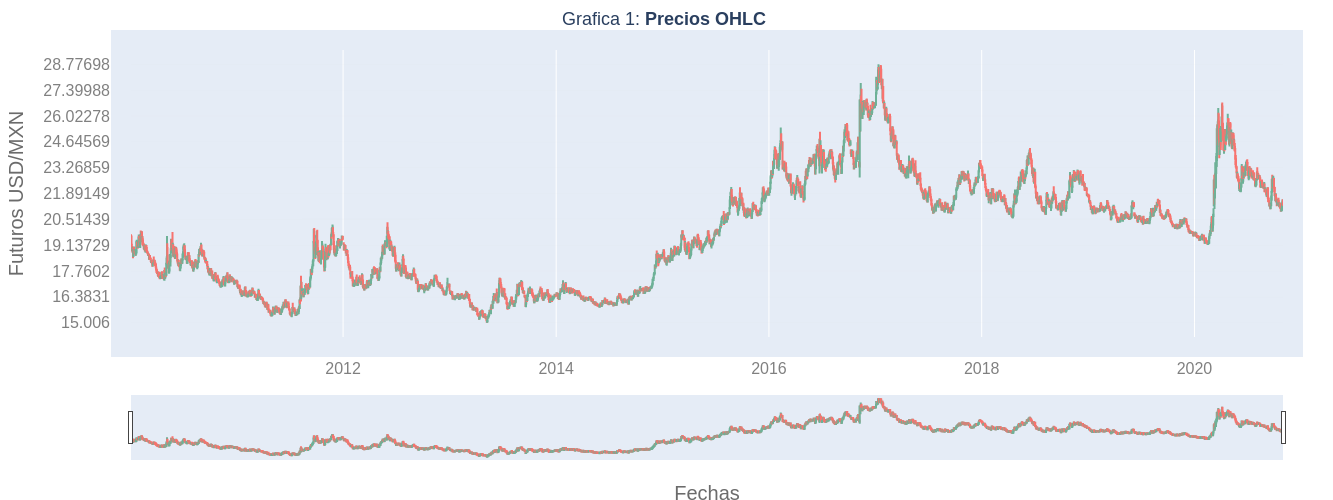

In [3]:
# General dataframe with all the data for the project
general_data = dt.ohlc_data.copy()

# ------------------------------------------------------------- PLOT 1: MXN/USD Historical Future Prices -- #
# --------------------------------------------------------------- -------------------------------------- -- #

# Plot 1 : time series candlesticks OHLC historical prices
plot_1 = vs.g_ohlc(p_ohlc=general_data, p_theme=dt.theme_plot_1, p_vlines=None)

# Render plot
plot_1

# 3. Pruebas y resultados


<hr style="border:0.02in solid black"> </hr>

# 4. Análisis de complejidad


<hr style="border:0.02in solid black"> </hr>

# 5. Conclusiones


<hr style="border:0.02in solid black"> </hr>